In [1]:
# Libraries to open 'netcdf' file
import netCDF4
import xarray

# To pre-process dataframe and use in visualization
import numpy as np
import pandas as pd

# To create visualization, graphs, and plots
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap # to create geo-spatial map, requires dependencies installation

import plotly.express as px
#import cartopy.crs as ccrs

# To Display the content
from IPython.display import display, HTML, Image

In [3]:
%%time
df_oco2= netCDF4.Dataset('./oco2_LtCO2_140906_B11100Ar_230523232559s.nc4')

CPU times: total: 78.1 ms
Wall time: 653 ms


In [4]:
list(df_oco2.variables.keys())

['sounding_id',
 'levels',
 'bands',
 'vertices',
 'date',
 'latitude',
 'longitude',
 'time',
 'solar_zenith_angle',
 'sensor_zenith_angle',
 'xco2_quality_flag',
 'xco2_qf_bitflag',
 'xco2_qf_simple_bitflag',
 'source_files',
 'file_index',
 'vertex_latitude',
 'vertex_longitude',
 'xco2',
 'xco2_x2019',
 'xco2_uncertainty',
 'xco2_apriori',
 'pressure_levels',
 'co2_profile_apriori',
 'xco2_averaging_kernel',
 'pressure_weight']

In [5]:
df_xco2= pd.DataFrame(columns=[ "Latitude", "Longitude", "DateTime","xco2", "xco2_quality_flag"])

df_xco2["xco2"]= df_oco2["xco2"][:]
df_xco2["dateTime"]= df_oco2["time"][:]
df_xco2["latitude"]= df_oco2["latitude"][:]
df_xco2["longitude"]= df_oco2["longitude"][:]
df_xco2["xco2_quality_flag"]= df_oco2["xco2_quality_flag"][:]

In [11]:
map_token= 'pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA'


In [6]:
print("MAX: ", np.max(df_oco2["xco2"]))
print("MIN: ", np.min(df_oco2["xco2"]))

MAX:  412.65323
MIN:  336.94058


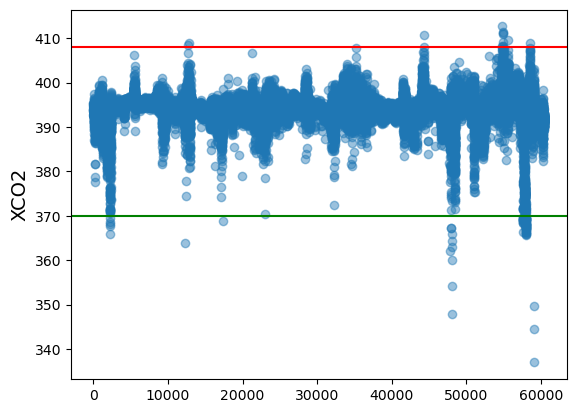

In [8]:
plt.scatter(np.arange(0, len(df_oco2['xco2'][:])), df_oco2['xco2'][:], alpha= 0.45)
plt.ylabel('XCO2', fontsize= 14)
plt.axhline(y= 408, c='r')
plt.axhline(y= 370, c= 'green')

In [9]:
max_ppm= float(408)
min_ppm= float(370)

In [12]:
%%time
# Filter XCO2 ppm by max and min XCo2 ppm to reflect the variation
new_data= df_xco2[df_xco2['xco2'] < max_ppm]
new_data= new_data[new_data['xco2'] > min_ppm]

# set mapbox access token
px.set_mapbox_access_token(map_token)

# passing Latitude, Longitude, and Xco2 product
# Retrieve all data and passing into function
fig= px.scatter_mapbox(new_data,
                      lat= new_data['latitude'],
                      lon= new_data['longitude'],
                      color= new_data['xco2'],        
                       zoom= 0,
                      size_max= 0.10,

                      color_continuous_scale= ["yellow", "orange", "red"]
#                       color_continuous_scale= ["blue", "green", "red"]
#                      hover_name=df_xco2['DateTime']
                      )

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=map_token,
        bearing=0,
        pitch=0,
        zoom=0,
        style="white-bg",
        layers=[{
            "below":'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
        ]
    )
    ,title='OCO2- XCO2, Atmospheric Carbon Dioxide'

)

fig.show()

CPU times: total: 3.25 s
Wall time: 19.8 s


In [13]:
%%time
def subsetting_coordinates(data, South, North, West, East, zoom = 2):
    
    # Create dataframe and columns
    df_xco2= pd.DataFrame(columns=[ "Latitude", "Longitude", "DateTime","xco2", "xco2_quality_flag"])
    
    df_xco2["xco2"]= data["xco2"][:]
    df_xco2["dateTime"]= data["time"][:]
    df_xco2["latitude"]= data["latitude"][:]
    df_xco2["longitude"]= data["longitude"][:]
    df_xco2["xco2_quality_flag"]= data["xco2_quality_flag"][:]

    # Passing the new Dataframe and filtering the coordinates by region/ country: 
    df_first= df_xco2[(df_xco2["latitude"] > South) &(df_xco2["latitude"]< North)]
    df_second= df_first[(df_first["longitude"] >West) & (df_first["longitude"] < East)]
    
    
    # set token
    px.set_mapbox_access_token(map_token)

    fig_second= px.scatter_mapbox(df_second,
                          lat= 'latitude',
                          lon= 'longitude',
                          color= 'xco2',
                          zoom= zoom,
                          size_max= 15,
                          color_continuous_scale= ["yellow", "orange", "red"]
                          )

#    if darkmap == 1:
    fig_second.update_layout(
    mapbox_style="dark",
    title='OCO2- XCO2, Atmospheric Carbon Dioxide')

#         )
#     else:
#         fig_second.update_layout(
#         mapbox_style="stamen-watercolor",
#         title='OCO2- XCO2, Atmospheric Carbon Dioxide'

#         )

    fig_second.show()

CPU times: total: 0 ns
Wall time: 0 ns


## Australia coordinates:
- latitude: (-45.75 : -9)
- longitude: (110 : 156)

In [14]:
%%time
subsetting_coordinates(df_oco2, -45.75, -9, 110, 156, zoom= 2)

CPU times: total: 484 ms
Wall time: 505 ms


In [5]:
ur =[]
with open ('subset_OCO2_L2_Lite_FP_11.1r_20230920_091205_.txt') as f:
  for filename in f: 
    ur.append(filename)
print(ur[0])

https://docserver.gesdisc.eosdis.nasa.gov/public/project/OCO/OCO2_V11.1_OCO3_V10_L2_Data_Users_Guide_v3.0_RevA.pdf



In [ ]:
import glob
from netCDF4 import Dataset
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm


def temp_csvs(path,cities):
    # Make the date range and the data frame
    drange = pd.date_range(start="1/1/2014",end=f"31/12/15",freq="D") 
    date_range = [str(d)[0:7] for d in drange]
    df = pd.DataFrame(0.0, columns=['CO2'], index=date_range)

    # Get a city to make its csv
    for city in tqdm(cities):
        print(city)
        city_lat = cities[city][0]
        city_lon = cities[city][1]

        # Iterate over the year
        for yr in tqdm(date_range):
            m = yr.replace("-","")

            # Iterate over each month 
            for file in glob.glob(f'{path}/*.nc4'):

                # Find the relevent file
                if m in file:

                    # Make dateset and extract lat and lans
                    data = Dataset(file, 'r')
                    lat = data.variables['latitude'][:]
                    lon = data.variables['longitude'][:]

                    sq_diff_lat = (lat - city_lat)**2
                    sq_diff_lon = (lon - city_lon)**2

                    # Compute the index of the lat lon
                    min_index_lat = sq_diff_lat.argmin()
                    min_index_lon = sq_diff_lon.argmin()

                    co2 = data.variables['xco2'][:]

                    # print("Recording values for: "+yr)
                    # Add temp values into the data frame
                    v = co2[0, min_index_lat, min_index_lon]
                    df.loc[yr]['CO2'] = v 

        #  Write the csv
        df.to_csv(f'{path}/{city}.csv')

if __name__ == "__main__":
    path = r"F:\data"

    cities = {
    "Lahore":(31.57,74.40),
    "Faisalabad":(31.43,73.15),
    "Sahiwal":(30.66,73.12),
    "Khanawal":(30.28,71.94),
    "Multan":(30.16,71.54),
    "Jhang":(31.27,72.35),
    "Bahawalpur":(29.35,71.74),
    "Rahim Yar Khan":(28.42,70.33),
    "Dera Gazi Khan":(30.05,70.68),
    "Layyah":(30.96,70.96),
    "Layyah":(31.62,71.11),
    "Mianwali":(32.58,71.56)
}
    temp_csvs(path,cities)




In [6]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
from datetime import datetime

In [5]:
def conv_date(d):
    return datetime.strptime(str(d), '%Y%m%d%H%M%S%f')

In [8]:
path_file= './CO2_Files/oco2_LtCO2_140906_B11100Ar_230523232559s.nc4'
# FUNCTION to convert data
city_lat,city_lon = 31.57,74.40

data= Dataset(path_file)

# get the HDF data and convert to CSV
df_xco2= pd.DataFrame()

df_xco2['Xco2']= data.variables['xco2'][:]
df_xco2['Latitude']= data.variables['latitude'][:]
df_xco2['Longitude']= data.variables['longitude'][:] 
df_xco2['quality_flag']= data.variables['xco2_quality_flag'][:] 

# Date
df_xco2['DateTime']= data.variables['sounding_id'][:]

#Convert soundingID to datetime format
df_xco2['DateTime']= df_xco2['DateTime'].apply(conv_date)
df_xco2['DateTime']= pd.to_datetime(df_xco2['DateTime'])

# YEAR and month column
df_xco2['Year']= df_xco2['DateTime'].dt.year
df_xco2['Month']= df_xco2['DateTime'].dt.month
df_xco2['Day']= df_xco2['DateTime'].dt.day

# Refine the ENTIRE dataframe by GOOD quality_flag->0
# NOTE: REDUCES the size of the file
df_xco2= df_xco2[df_xco2['quality_flag'] == 0]   


date= str(data.variables['sounding_id'][0])      

# create a CSV and store on new folder: csv_files
# df_xco2.to_csv('oco2_xco2_'+ date+'_.csv', index= False)

lat = df_xco2['Latitude']
lon = df_xco2['Longitude']

sq_diff_lat = (lat - city_lat)**2
sq_diff_lon = (lon - city_lon)**2

# Compute the index of the lat lon
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()



18851 11970
Empty DataFrame
Columns: [Xco2, Latitude, Longitude, quality_flag, DateTime, Year, Month, Day]
Index: []


In [ ]:
print('City Lat: '+str(city_lat), 'City Lon: '+str(city_lon))

latitude = (df_xco2['Latitude'] - city_lat).abs()
min_distance = latitude.min()
lat_idx = latitude.idxmin()

longitude = (df_xco2['Longitude'] - city_lon).abs()
min_distance = longitude.min()
lon_idx = longitude.idxmin()

print(lon_idx, lat_idx)
lat, lon = df_xco2['Latitude'][lon_idx], df_xco2['Longitude'][lat_idx]
print(lat,lon)
print(df_xco2[(df_xco2['Latitude'][lat_idx]==lat) and (df_xco2['Longitude'][lon_idx]==lon)])

In [6]:
import xarray as xr

xds = xr.open_dataset('oco2_LtCO2_140910_B11100Ar_230523233531s.nc4')
# Extract the variables
lat = xds['latitude'] # 1-D array of latitudes

In [8]:
# Import the packages
import xarray as xr
import numpy as np
import scipy.interpolate
import rioxarray as rio

# Define the list of netCDF files
nc_files = ['oco2_LtCO2_141008_B11100Ar_230524004349s.nc4',
            'oco2_LtCO2_141009_B11100Ar_230524004410s.nc4',
            'oco2_LtCO2_140910_B11100Ar_230523233531s.nc4',
            'oco2_LtCO2_140911_B11100Ar_230523233712s.nc4',
            'oco2_LtCO2_140912_B11100Ar_230523234055s.nc4',
            'oco2_LtCO2_141013_B11100Ar_230524005158s.nc4',
            'oco2_LtCO2_141014_B11100Ar_230524005459s.nc4',
            'oco2_LtCO2_141015_B11100Ar_230524005605s.nc4',
            'oco2_LtCO2_141016_B11100Ar_230524005854s.nc4',
            'oco2_LtCO2_141017_B11100Ar_230524010023s.nc4',
            'oco2_LtCO2_141018_B11100Ar_230524010318s.nc4',
            'oco2_LtCO2_141019_B11100Ar_230524010418s.nc4',
            'oco2_LtCO2_141020_B11100Ar_230524010710s.nc4',
            'oco2_LtCO2_141021_B11100Ar_230524010738s.nc4',
            'oco2_LtCO2_141022_B11100Ar_230524011027s.nc4',
            'oco2_LtCO2_141023_B11100Ar_230524011134s.nc4']

# Loop over the files and concatenate the data
data_list = []
for nc_file in nc_files:
    # Open the netCDF file
    xds = xr.open_dataset(nc_file)
    # Extract the variables
    lat = xds['latitude'] # 1-D array of latitudes
    lon = xds['longitude'] # 1-D array of longitudes
    xco2 = xds['xco2'] # 1-D array of XCO2 values
    # time = xds['sounding_id'] # 1-D array of time values
    # Create a data array with the coordinates and values
    data = xr.DataArray(xco2, coords={'lat': lat, 'lon': lon})
    # Append the data array to the list
    data_list.append(data)

# Concatenate the data list into a single dataset
data = data_list

# Create a grid of coordinates
grid_lat = np.linspace(-90, 90, 180) # 1-D array of grid latitudes
grid_lon = np.linspace(-180, 180, 360) # 1-D array of grid longitudes
# grid_time = np.unique(time) # 1-D array of grid time values
grid_x, grid_y = np.meshgrid(grid_lon, grid_lat) # 3-D arrays of grid coordinates

# Interpolate the OCO-2 data onto the grid
grid_xco2 = scipy.interpolate.griddata((lon, lat), xco2, (grid_x, grid_y), method='linear')

# Convert the gridded data to an xarray data array
grid_xco2 = xr.DataArray(grid_xco2, coords=[('lat', grid_lat), ('lon', grid_lon)])

# Define the CRS projection
grid_xco2.rio.write_crs('epsg:4326', inplace=True)


# Save the GeoTIFF file
grid_xco2.rio.to_raster('oco2_16days_global_grid.tiff')


TypeError: unhashable type: 'DataArray'

In [2]:
import os
os.chdir("./CO2_Files/")

In [3]:
os.getcwd()

'f:\\Subhan_Ali_Kazmi\\notebooks\\XCO\\CO2_Files'